<a href="https://colab.research.google.com/github/yenlung/AI-Demo/blob/master/%E3%80%90Demo08%E3%80%91%E7%94%A8diffusers%E5%A5%97%E4%BB%B6%E7%94%9F%E6%88%90%E5%9C%96%E5%83%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🖼️ 用 diffusers 套件生成圖像 (學習篇)

### 1. 安裝必要套件

In [1]:
!pip install diffusers transformers accelerate safetensors huggingface_hub gradio --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.7/354.7 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.6/322.6 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 96.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.

In [2]:
from diffusers import StableDiffusionPipeline, UniPCMultistepScheduler
import torch
import gc
import matplotlib.pyplot as plt

萬一需要 HuggingFace Token 時請這樣做

In [ ]:
# from huggingface_hub import login
# from google.colab import userdata
#
# hf_token = userdata.get('HuggingFace')
# login(token=hf_token)

### 2. 讀入模型

In [3]:
model_name = "digiplay/majicMIX_realistic_v6"

為了固定 random seed, 請在這裡選一個吉祥的數字。

In [11]:
N = 31327

In [4]:
pipe = StableDiffusionPipeline.from_pretrained(
    model_name,
    torch_dtype=torch.float16,
    #revision="fp16",  # for SD 1.5 and 2.1
    use_safetensors=True
).to("cuda")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/520 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/580 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.61k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/582 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


### 3. 基本生圖

In [5]:
# 解析度
height = 512
width = 768

# 推理步數
num_inference_steps = 50

# 指引強度
guidance_scale = 7.5

In [6]:
gc.collect()
torch.cuda.empty_cache()

In [7]:
prompt = "a Taiwanese college student using her laptops in a cafe."

In [ ]:
# 固定 random seed
seed = N
generator = torch.Generator("cuda").manual_seed(seed)

In [8]:
image_basic = pipe(
    prompt=prompt,
    height=height,
    width=width,
    num_inference_steps=num_inference_steps,
    guidance_scale=guidance_scale,
    generator=generator
).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

(np.float64(-0.5), np.float64(767.5), np.float64(511.5), np.float64(-0.5))

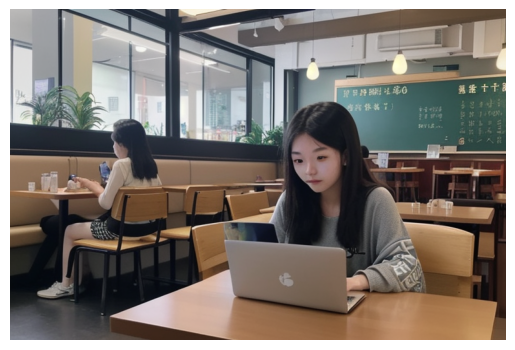

In [9]:
plt.imshow(image_basic)
plt.axis("off")

### 4. Prompt 優化

#### 4-1 加入 Negative Prompt

In [12]:
gc.collect()
torch.cuda.empty_cache()

In [14]:
negative_prompt = "easynegative, human, lowres, bad anatomy, bad hands, text, error, missing fingers, extra digit, fewer digits, cropped, worstquality, low quality, normal quality, jpegartifacts, signature, watermark, username, blurry, bad feet, cropped, poorly drawn hands, poorly drawn face, mutation, deformed, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, extra fingers, fewer digits, extra limbs, extra arms,extra legs, malformed limbs, fused fingers, too many fingers, long neck, cross-eyed,mutated hands, polar lowres, bad body, bad proportions, gross proportions, text, error, missing fingers, missing arms, missing legs, extra digit, extra arms, extra leg, extra foot"

In [19]:
seed = N
generator = torch.Generator("cuda").manual_seed(seed)

In [20]:
image_ng_prompt = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    height=height,
    width=width,
    num_inference_steps=num_inference_steps,
    guidance_scale=guidance_scale,
    generator=generator
).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

(np.float64(-0.5), np.float64(767.5), np.float64(511.5), np.float64(-0.5))

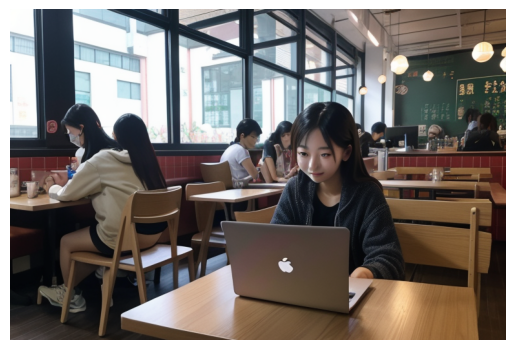

In [21]:
plt.imshow(image_ng_prompt)
plt.axis("off")

#### 4-2 優化原有的 prompt

In [23]:
gc.collect()
torch.cuda.empty_cache()

In [22]:
enhanced_prompt = prompt + ", masterpiece, ultra high quality, intricate skin details, cinematic lighting"

In [24]:
seed = N
generator = torch.Generator("cuda").manual_seed(seed)

In [25]:
image_ng_prompt = pipe(
    prompt=enhanced_prompt,
    negative_prompt=negative_prompt,
    height=height,
    width=width,
    num_inference_steps=num_inference_steps,
    guidance_scale=guidance_scale,
    generator=generator
).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

(np.float64(-0.5), np.float64(767.5), np.float64(511.5), np.float64(-0.5))

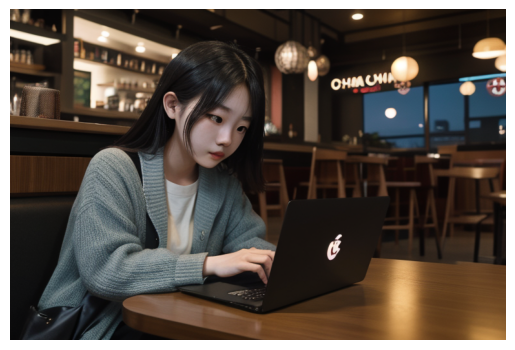

In [26]:
plt.imshow(image_ng_prompt)
plt.axis("off")

### 5. 換新的排程器

In [28]:
# 換成 UniPCMultistepScheduler
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)

#### 如果需要, 重新修改 prompt

In [41]:
prompt = "a Taiwanese college student using her laptops in a cafe."

enhanced_prompt = prompt + ", masterpiece, ultra high quality, intricate skin details, cinematic lighting"
negative_prompt = "easynegative, human, lowres, bad anatomy, bad hands, text, error, missing fingers, extra digit, fewer digits, cropped, worstquality, low quality, normal quality, jpegartifacts, signature, watermark, username, blurry, bad feet, cropped, poorly drawn hands, poorly drawn face, mutation, deformed, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, extra fingers, fewer digits, extra limbs, extra arms,extra legs, malformed limbs, fused fingers, too many fingers, long neck, cross-eyed,mutated hands, polar lowres, bad body, bad proportions, gross proportions, text, error, missing fingers, missing arms, missing legs, extra digit, extra arms, extra leg, extra foot"

In [37]:
# 清除記憶體
gc.collect()
torch.cuda.empty_cache()

In [38]:
seed = N
generator = torch.Generator("cuda").manual_seed(seed)

In [39]:
image_strong = pipe(
        prompt=enhanced_prompt,
        negative_prompt=negative_prompt,
        height=height,
        width=width,
        num_inference_steps=20,
        #num_inference_steps=num_inference_steps,
        guidance_scale=guidance_scale,
        generator=generator
        ).images[0]

  0%|          | 0/20 [00:00<?, ?it/s]

(np.float64(-0.5), np.float64(767.5), np.float64(511.5), np.float64(-0.5))

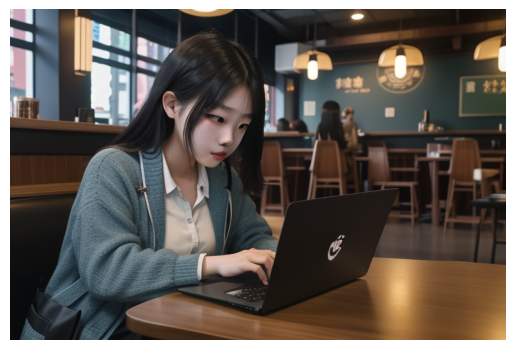

In [40]:
plt.imshow(image_strong)
plt.axis("off")